
# Deep Learning: Assignment 7

Import necessary libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split

In [34]:
df=pd.read_csv("riceClassification.csv")

In [35]:
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0



# Features in Riceclassification Dataset

In [36]:
features=['id','Area','MajorAxisLength','Eccentricity','ConvexArea','EquivDiameter','Extent','Perimeter','Roundness','AspectRation','Class']
target=['Class']

In [37]:
X=df[features]
y=df[target]


# Linear Regression

In [38]:
lr = LinearRegression()
lr.fit(X, y)
predictions = lr.predict(X)

In [39]:
lr.coef_

array([[-1.00371605e-19,  4.77048956e-17, -5.97213920e-16,
        -2.18680706e-14, -4.83554169e-17, -2.22149002e-16,
        -2.15111777e-16,  3.45467893e-16,  1.18325381e-15,
        -4.08302968e-17,  1.00000000e+00]])

In [40]:
lr.intercept_

array([2.43138842e-14])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:


def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(10, 5))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()



In [43]:
def evaluate_model(Model, lambdas):
    training_errors = [] # we will store the error on the training set, for using each different lambda
    testing_errors = [] # and the error on the testing set
    for l in lambdas:
        # in sklearn, they refer to lambda as alpha, the name is different in different literature
        # Model will be either Lasso, Ridge or ElasticNet
        model = Model(alpha=l, max_iter=1000) # we allow max number of iterations until the model converges
        model.fit(X_train, y_train)

        training_predictions = model.predict(X_train)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)

        testing_predictions = model.predict(X_test)
        testing_mse = mean_squared_error(y_test, testing_predictions)
        testing_errors.append(testing_mse)
    return training_errors, testing_errors


<ipython-input-43-d3cd89c80cfa>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.339e+01, tolerance: 3.602e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or con

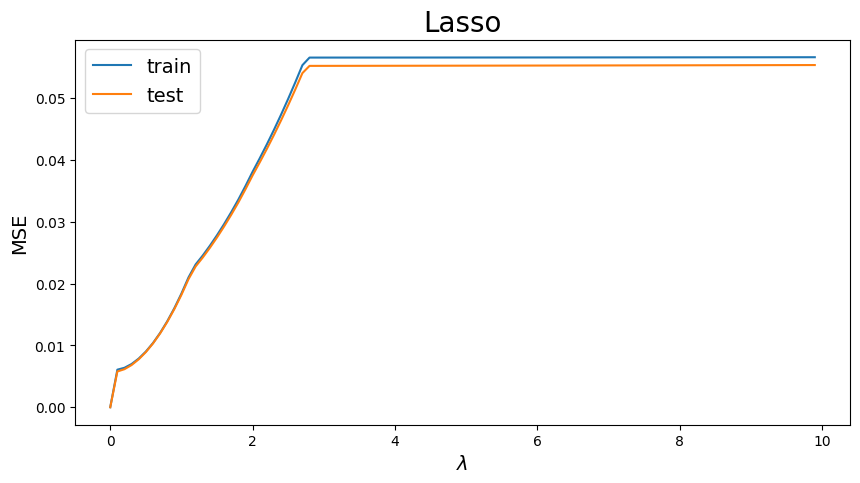

In [44]:
from sklearn.metrics import mean_squared_error
lambdas = np.arange(0, 10, step=0.1)

lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.339e+01, tolerance: 3.602e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.470e+01, tolerance: 3.602e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.594e+01, tolerance: 3.602e

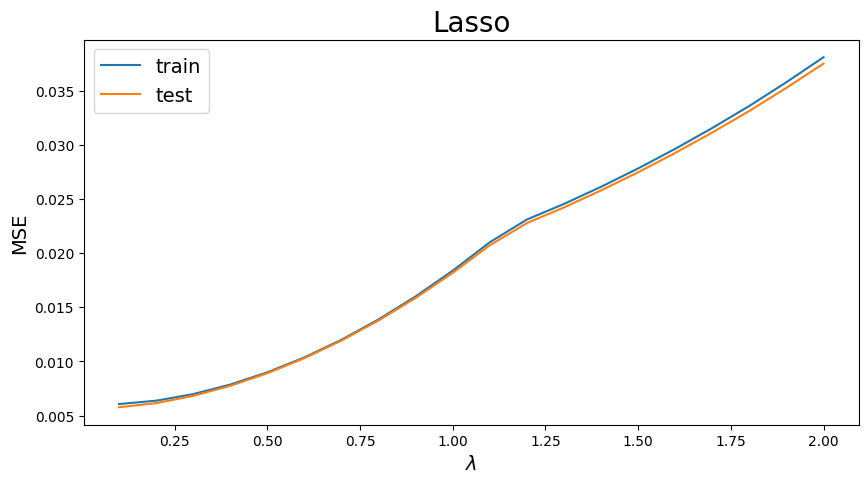

In [45]:
import numpy as np
from sklearn.linear_model import Lasso

lambdas = np.arange(0.1, 2.1, step=0.1)

lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")


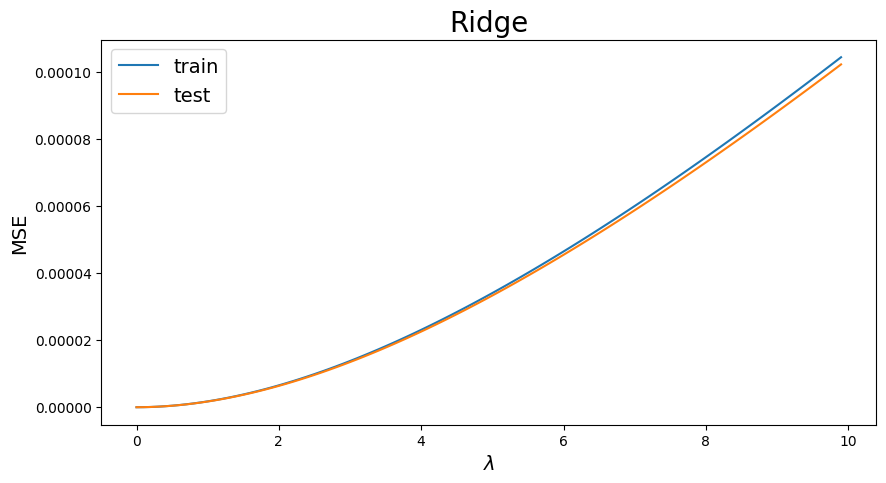

In [46]:
lambdas = np.arange(0, 10, step=0.1)

ridge_train, ridge_test = evaluate_model(Ridge, lambdas)
plot_errors(lambdas, ridge_train, ridge_test, "Ridge")

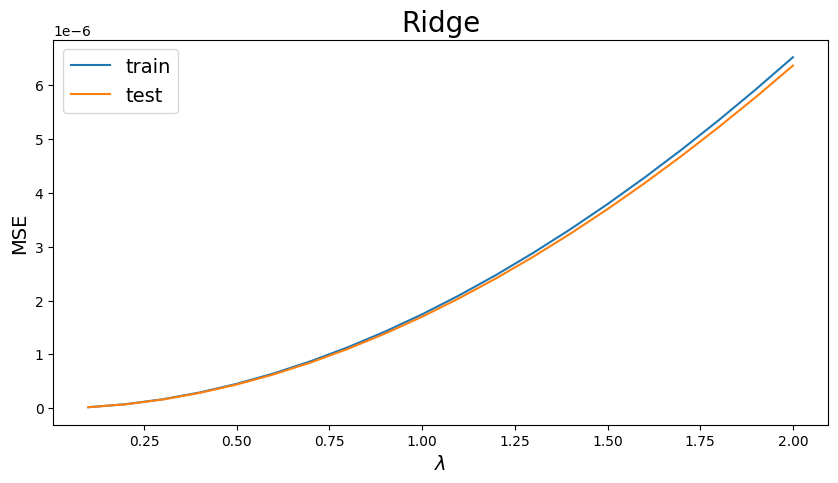

In [47]:
import numpy as np
from sklearn.linear_model import Ridge

lambdas = np.arange(0.1, 2.1, step=0.1)

ridge_train, ridge_test = evaluate_model(Ridge, lambdas)
plot_errors(lambdas, ridge_train, ridge_test, "Ridge")



# Ridge Regression

In [48]:

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,30,35,40,45,50,55,100]}
ridge_reg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=6) #we have to find which value of lambda suits
ridge_reg.fit(X,y)

GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 19, 20,
                                   30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

# Lasso Regression

In [49]:
Lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,30,35,40,45,50,55,100]}
Lasso_reg=GridSearchCV(Lasso,parameters,scoring='neg_mean_squared_error',cv=6) #we have to find which value of lambda suits
Lasso_reg.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+01, tolerance: 3.764e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.309e+01, tolerance: 3.775e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.294e+01, tolerance: 3.785e

GridSearchCV(cv=6, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 19, 20,
                                   30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')


# Best Parameters

In [50]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)
print(Lasso_reg.best_params_)
print(Lasso_reg.best_score_)

{'alpha': 1e-15}
-1.6893613791286345e-27
{'alpha': 1e-08}
-2.680609006963726e-06


<ipython-input-51-fc6ae94377dd>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_ridge)


<Axes: ylabel='Density'>

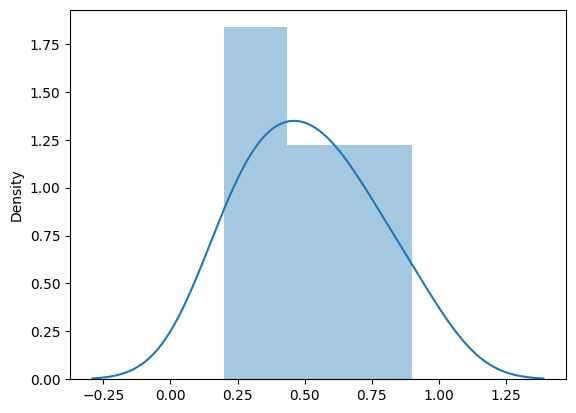

In [51]:
import seaborn as sns
import numpy as np

# Assuming pred_ridge is a NumPy array or a list containing the predicted values
pred_ridge = np.array([0.2, 0.5, 0.7, 0.3, 0.9, 0.6, 0.4])

# Use sns.histplot() to visualize the distribution of the predicted values
sns.distplot(pred_ridge)



<ipython-input-52-ac0c1e4b2c5e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_Lasso)


<Axes: ylabel='Density'>

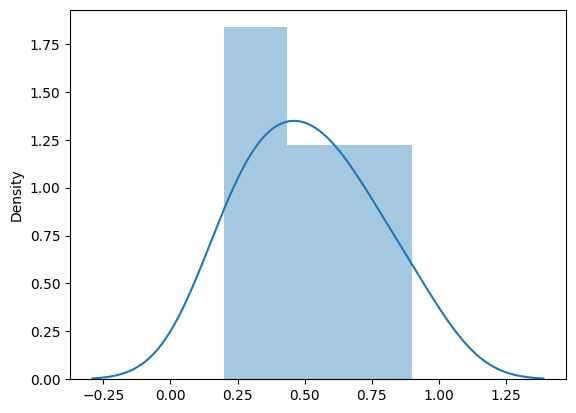

In [52]:
import seaborn as sns
import numpy as np

# Assuming pred_ridge is a NumPy array or a list containing the predicted values
pred_Lasso = np.array([0.2, 0.5, 0.7, 0.3, 0.9, 0.6, 0.4])

# Use sns.histplot() to visualize the distribution of the predicted values
sns.distplot(pred_Lasso)